In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn import metrics
import os
from sklearn.preprocessing import normalize

In [10]:
pr_files = [file for file in os.listdir() if 'cleaned.pk1' in file]
pr_files

['adamsmith_pr_cleaned.pk1',
 'embulk_pr_cleaned.pk1',
 'google_pr_cleaned.pk1',
 'guillaume_pr_cleaned.pk1',
 'iven_pr_cleaned.pk1',
 'oleiade_pr_cleaned.pk1',
 'pandas_pr_cleaned.pk1',
 'yang_pr_cleaned.pk1']

In [11]:
# Check shape
for file in pr_files:
    print(file, pd.read_pickle(file).shape)

adamsmith_pr_cleaned.pk1 (1, 13)
embulk_pr_cleaned.pk1 (786, 13)
google_pr_cleaned.pk1 (134, 13)
guillaume_pr_cleaned.pk1 (3, 13)
iven_pr_cleaned.pk1 (8, 13)
oleiade_pr_cleaned.pk1 (46, 13)
pandas_pr_cleaned.pk1 (12797, 16)
yang_pr_cleaned.pk1 (12, 13)


In [12]:
adamsmith = pd.read_pickle(pr_files[0])
embulk = pd.read_pickle(pr_files[1])
google = pd.read_pickle(pr_files[2])
guillaume = pd.read_pickle(pr_files[3])
iven = pd.read_pickle(pr_files[4])
oleiade = pd.read_pickle(pr_files[5])
pandas = pd.read_pickle(pr_files[6])
yang = pd.read_pickle(pr_files[7])

In [13]:
adamsmith.head()

,authorAssociation,bodyText,closedAt,comments,createdAt,resourcePath,state,title,updatedAt,author,company,files,mergedBy
0,OWNER,Test PR,NaT,"{'totalCount': 1, 'nodes': [{'author': {'login...",2019-05-21 18:31:23+00:00,/adamsmith/game-theory-poker/pull/1,OPEN,Update DoShowdowns.java,2019-05-21 18:31:25+00:00,adamsmith,@kiteco,1,NaN


In [18]:
def monthly_count(df):
    
    # Change to pandas datetime object
    df['createdAt'] =  df['createdAt'].apply(pd.Timestamp)
    df['closedAt'] =  df['closedAt'].apply(pd.Timestamp)
    
    # Group by committedDate's month and get the count
    df_group = df.groupby(df['createdAt'].dt.to_period('M')) \
                                                 .count()['title'] \
                                                 .reset_index() \
                                                 .rename(columns={'title': 'countByMonth'})
    
    # Normalize count and create a insert back into df_group
    df_group['countByMonthNorm'] = normalize([df_group['countByMonth']])[0]
    
    return df_group

In [19]:
adamsmith_pr = monthly_count(adamsmith)
embulk_pr = monthly_count(embulk)
google_pr = monthly_count(google)
guillaume_pr = monthly_count(guillaume)
iven_pr = monthly_count(iven)
oleiade_pr = monthly_count(oleiade)
pandas_pr = monthly_count(pandas)
yang_pr = monthly_count(yang)

C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Convertin

In [20]:
from tslearn.metrics import dtw_path

In [21]:
monthly_pr_list = [adamsmith_pr, embulk_pr, google_pr, guillaume_pr, iven_pr, oleiade_pr, pandas_pr, yang_pr]
monthly_pr_list_str = ['adamsmith_pr', 'embulk_pr', 'google_pr', 'guillaume_pr', 'iven_pr', 'oleiade_pr', 'pandas_pr', 'yang_pr']

In [22]:
def calc_dtw(issue_num):
    dtw = []
    path = []

    for el in range(len(monthly_pr_list)):
        dtw_pathing = dtw_path(monthly_pr_list[issue_num].iloc[:,-1].tolist(), monthly_pr_list[el].iloc[:,-1].tolist())
        dtw.append((monthly_pr_list_str[issue_num], monthly_pr_list_str[el], dtw_pathing[1]))
        path.append((monthly_pr_list_str[issue_num], monthly_pr_list_str[el], dtw_pathing[0]))
        
    return dtw, path

In [23]:
def plot_graph(dtw, num_dtw, pr_num):
    print(dtw[pr_num])
    monthly_pr_list[num_dtw].plot(x='createdAt', y='countByMonthNorm')
    monthly_pr_list[pr_num].plot(x='createdAt', y='countByMonthNorm')

In [25]:
dtw_1, path_1 = calc_dtw(1)

In [28]:
dtw_1

[('embulk_pr', 'adamsmith_pr', 6.6262339773821),
 ('embulk_pr', 'embulk_pr', 0.0),
 ('embulk_pr', 'google_pr', 0.4811666946880229),
 ('embulk_pr', 'guillaume_pr', 2.680476629915532),
 ('embulk_pr', 'iven_pr', 1.2701481265973096),
 ('embulk_pr', 'oleiade_pr', 0.7712999963507984),
 ('embulk_pr', 'pandas_pr', 0.5173608211438785),
 ('embulk_pr', 'yang_pr', 1.1211304683488668)]

('embulk_pr', 'pandas_pr', 0.5173608211438785)


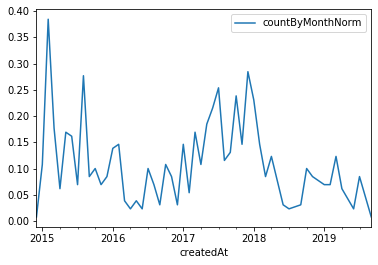

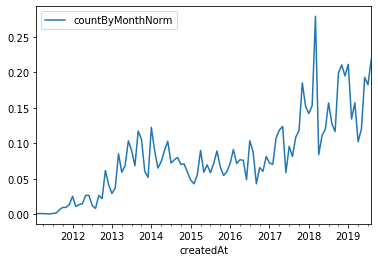

In [29]:
plot_graph(dtw_1, 1, 6)